In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [5]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [6]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [17]:
for i in boston_dataset.DESCR.split("\n\n") :
    print(i)

.. _boston_dataset:
Boston house prices dataset
---------------------------
**Data Set Characteristics:**  
    :Number of Instances: 506 
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-t

In [7]:
boston_dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
import pandas as pd

In [13]:
df_data = pd.DataFrame(boston_dataset.data, columns=boston_dataset['feature_names'])

In [14]:
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##  타겟도 추가하기

In [19]:
df_data['MEDV'] = boston_dataset.target

In [20]:
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## EDA 처리

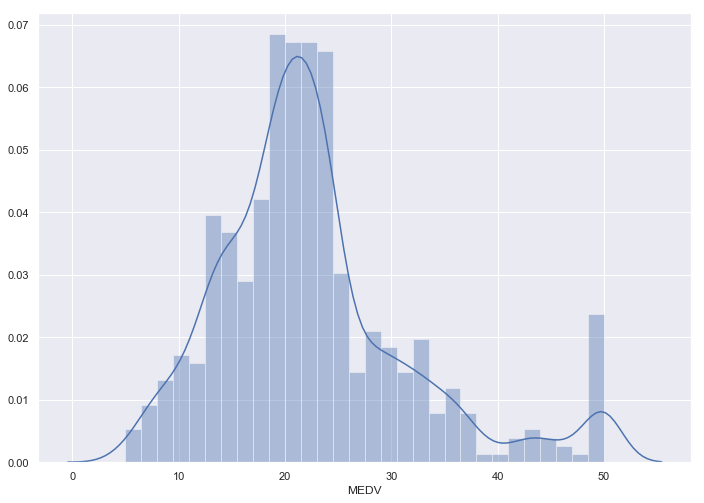

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_data['MEDV'], bins=30)
plt.show()

### 히트 맵 그래프 그리기

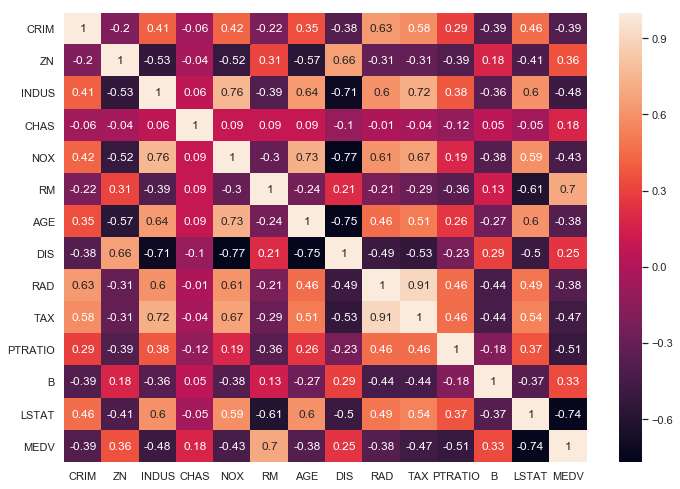

In [24]:
correlation_matrix = df_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## 분포 확인하기

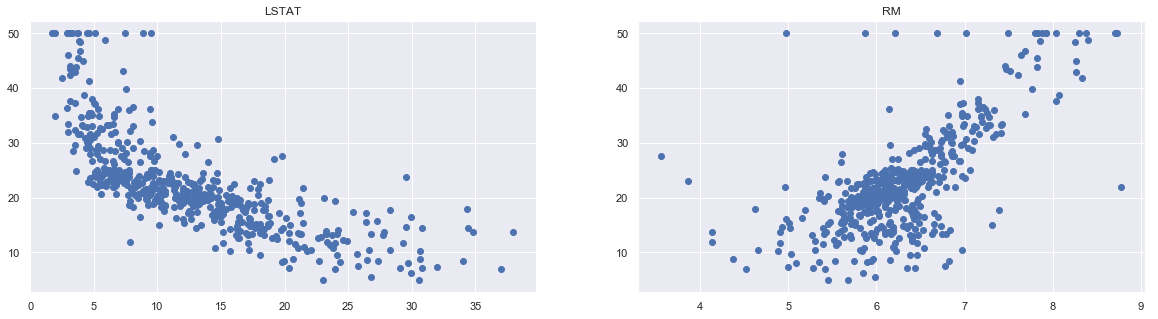

In [26]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df_data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)

In [27]:
X = pd.DataFrame(np.c_[df_data['LSTAT'], df_data['RM']], columns = ['LSTAT','RM'])
Y = df_data['MEDV']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
import numpy as np

In [41]:
# custom R2-score metrics for keras backend


def r2_score(y_true, y_pred):
    SS_res =  np.sum(np.square(y_true - y_pred)) 
    SS_tot = np.sum(np.square(y_true - np.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot ))  # epsilon() 값 추가할 것 

In [42]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


